In [1]:
#!/usr/bin/env python
import util
import os
import numpy as np
import scipy
dname = 'sample1'
# fname = 'sample'
flst = os.listdir(dname)
# bname = flst[0]

import librosa, librosa.display

for bname in flst:

    fname = os.path.join(*[dname,bname])
    # print fname
    # ali = 'valleys'
    ali = 'freqs_abs'
    ali = 'freqs'

    # thres = 0.05
    # ali = 'valleys_%d' % thres

    # ali = 'comp_256'
    p = util.piece( fname, alias = ali)
    p.set_wavelet('morlet')

    # freqs = p.bitrate * np.power(10,np.linspace(1.5,4.3,60))
    # scale = p.bitrate / freqs 
    logfmin = np.log10( p.bitrate / 8 )
    logfmax = np.log10( 10 )

    freqs = np.power(10,np.linspace( logfmin, logfmax,100))
    scale = 1./ freqs
    # scale = np.linspace(15,500,100)
    tmin = 10.
    tmax = 17.5
    coef, freqs = p.cwt( tmin, tmax, scale, p = 30 )
    # pks  = util.detect_peaks( - np.log10( 1 + 10*abs(coef)), ry = 20 )

    ts,xs = p.trimto(tmin, tmax)
    xs = xs.astype('float')
    sr = p.bitrate / 2.
    xs,sr = librosa.load(p.fname)
    xs = xs [:50000]
    fmin = librosa.midi_to_hz(36)
    hop_length = 512
    C = librosa.cqt(xs, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)
    logC = librosa.logamplitude(1 + 10*(C))
    im1 = librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')    
    chromagram = librosa.feature.chroma_cqt(x, sr=sr, hop_length=hop_length)
    im2 = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length)
    break


NameError: name 'x' is not defined

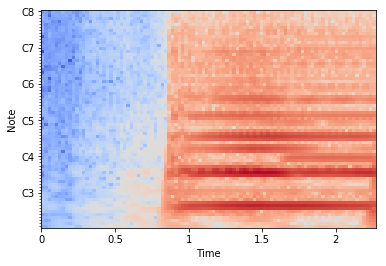

In [3]:
%matplotlib inline
fmin = librosa.midi_to_hz(36)
C = librosa.cqt(xs, sr=sr, fmin=fmin, n_bins=72)
logC = librosa.logamplitude(C)
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

In [60]:
x = xs

In [61]:
len(x) // sr

2

In [4]:
hop_length = 512
n_fft = 2048
X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
S = np.log10(abs(X)**2)
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')

NameError: name 'x' is not defined

In [5]:
S = librosa.feature.melspectrogram(x, sr=sr, n_fft=4096, hop_length=256)

NameError: name 'x' is not defined

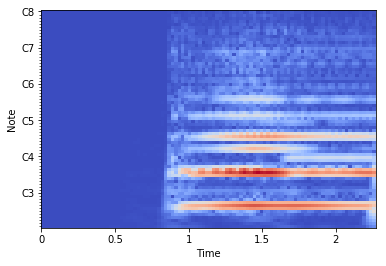

In [6]:
#         logC = librosa.logamplitude(1 + 10*(C))
logC = np.log10 ( 1 + 10 * abs(C))
im1 = librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')    
#     chromagram = librosa.feature.chroma_cqt(xs, sr=sr, hop_length=hop_length)
#     im2 = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length)
    

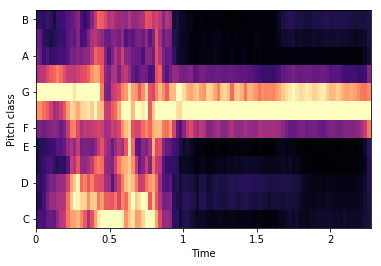

In [7]:
    chromagram = librosa.feature.chroma_cqt(xs, sr=sr, hop_length=hop_length)
    im2 = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length)
    

In [34]:
import IPython.display as ipd
ipd.Audio(xs, rate = sr)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
im1

In [24]:
im2

In [6]:
x,sr = librosa.load(p.fname)